<a href="https://colab.research.google.com/github/Darshan-20310597/Python-Prac/blob/main/Pytorch_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This will be a Building and a reference materials for basic of Pytorch

1. Tensors - 4D matrix 

In [1]:
import torch
import torch.nn as nn
import torchvision

In [2]:
tensor = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float32, device="cuda", requires_grad=True )
print(tensor)

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0', requires_grad=True)


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [4]:
print(tensor.shape) #veryimp
print(tensor.size())

torch.Size([2, 3])
torch.Size([2, 3])


Inializing tensors in pytorch
1. empty
2. zeros
3. ones
4. rand/ randn
5. eye - Identity Matrix
4. ranges - arange and linscpace
5. copy

In [5]:
tensor_empty = torch.empty(size=(4,3), dtype=float, device=device)
print(tensor_empty)

#Empty like with create a copy
tensor_empty_like = torch.empty_like(tensor_empty)
print(tensor_empty_like)

tensor([[2.0000e+00, 5.1200e+02, 8.1920e+03],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]], device='cuda:0',
       dtype=torch.float64)
tensor([[2.0000e+00, 5.1200e+02, 8.1920e+03],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]], device='cuda:0',
       dtype=torch.float64)


In [6]:
torch_zeroes =  torch.zeros(size=(2,2),dtype=int)
print (torch_zeroes)

torch_zeroes_like =  torch.zeros_like(tensor_empty)
print (torch_zeroes_like)

torch_zeroes_like1 =  torch.zeros_like(tensor)
print (torch_zeroes_like1)


tensor([[0, 0],
        [0, 0]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='cuda:0', dtype=torch.float64)
tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [7]:
torch_ones =  torch.ones(size=(2,2),dtype=int,device=device)
print (torch_ones)

torch_ones_like =  torch.ones_like(tensor_empty)
print (torch_ones_like)

torch_ones_like1 =  torch.ones_like(tensor)
print (torch_ones_like1)


tensor([[1, 1],
        [1, 1]], device='cuda:0')
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0', dtype=torch.float64)
tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


rand is for Uniform distribution (in the half-open interval [0.0, 1.0))


randn is for Standard Normal (aka. Gaussian) distribution (mean 0 and variance 1)



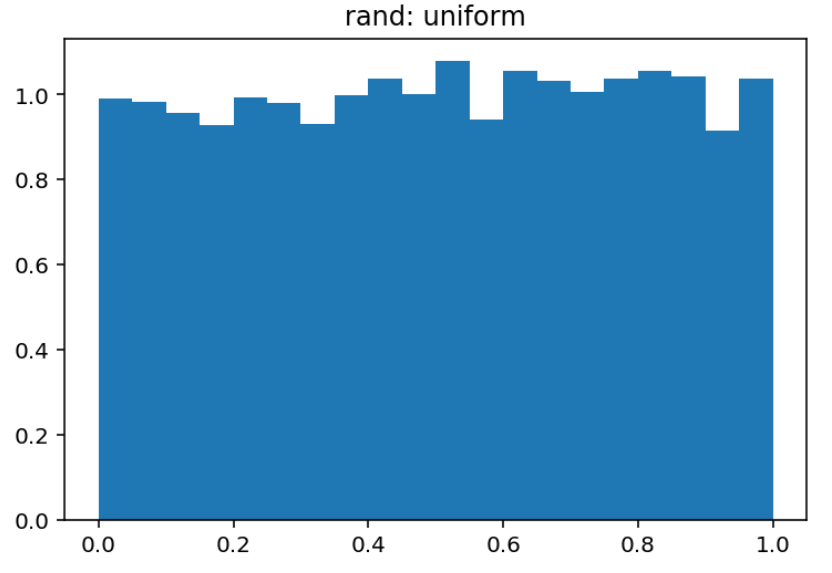


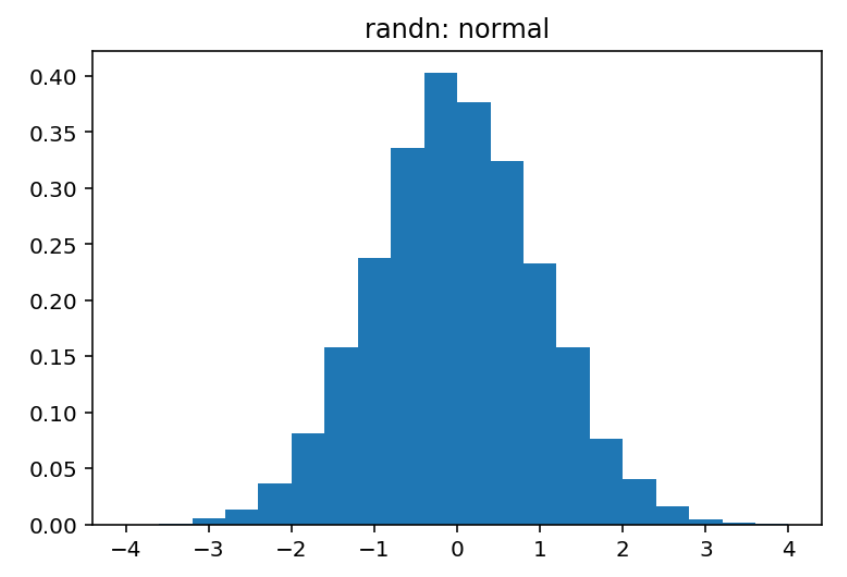

In [8]:
torch_rand =  torch.rand(size=(2,2),device=device)
print (torch_rand)

torch_rand_like =  torch.rand_like(tensor_empty)
print (torch_rand_like)

torch_rand_like1 =  torch.randn((3,3))
print (torch_rand_like1)

torch_rand_like1 =  torch.randn_like(tensor)
print (torch_rand_like1)

tensor([[0.0696, 0.2815],
        [0.5157, 0.4920]], device='cuda:0')
tensor([[0.1409, 0.4061, 0.7711],
        [0.2802, 0.6987, 0.7717],
        [0.7962, 0.7293, 0.4368],
        [0.9868, 0.4170, 0.2908]], device='cuda:0', dtype=torch.float64)
tensor([[-2.1628,  0.2898, -0.1997],
        [ 0.0113, -0.4362,  0.0430],
        [ 0.1399,  0.1526, -0.3396]])
tensor([[ 1.2190, -1.2301, -0.2615],
        [ 1.0844, -0.7097, -0.2044]], device='cuda:0')


In [9]:
torch_eye = torch.eye((3))
print(torch_eye)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [10]:
torch_aranges = torch.arange(start=0,end=20,step=2,device=device)
print (torch_aranges)

print (torch_aranges.reshape(2,5))


# With view
idx = torch.randperm(torch_aranges.nelement())
print("idx",idx)
t = torch_aranges.view(-1)[idx].view(torch_aranges.size())
print (t.reshape(5,2))

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18], device='cuda:0')
tensor([[ 0,  2,  4,  6,  8],
        [10, 12, 14, 16, 18]], device='cuda:0')
idx tensor([0, 4, 6, 7, 3, 2, 8, 9, 5, 1])
tensor([[ 0,  8],
        [12, 14],
        [ 6,  4],
        [16, 18],
        [10,  2]], device='cuda:0')



*** TRICKS 

t = torch.rand(4, 2, 3, 3)

idx = torch.randperm(t.shape[0])

t = t[idx].view(t.size())


Hello,
If we want to shuffle the order of image database (format: [batch_size, channels, height, width]), I think this is a good method:

t[idx] will retain the structure of channels, height, and width, while shuffling the order of the image.

In [11]:
torch_linspace = torch.linspace(4,45,3,device=device) # includes both end values
print(torch_linspace)

torch_linspace_shuffle = torch.linspace(4,45,30,device=device) # includes both end values
print(torch_linspace_shuffle.shape)

shuffle_linspace = torch_linspace_shuffle.reshape(6,5)
print(shuffle_linspace)

#Now let try to shuffle it 

idx_shuffle = torch.randperm(shuffle_linspace.nelement())
print(shuffle_linspace)
t = shuffle_linspace.view(-1)[idx_shuffle].view(shuffle_linspace.size())
print(t.view(6,5))
# Notes about view 

tensor([ 4.0000, 24.5000, 45.0000], device='cuda:0')
torch.Size([30])
tensor([[ 4.0000,  5.4138,  6.8276,  8.2414,  9.6552],
        [11.0690, 12.4828, 13.8966, 15.3103, 16.7241],
        [18.1379, 19.5517, 20.9655, 22.3793, 23.7931],
        [25.2069, 26.6207, 28.0345, 29.4483, 30.8621],
        [32.2759, 33.6897, 35.1034, 36.5172, 37.9310],
        [39.3448, 40.7586, 42.1724, 43.5862, 45.0000]], device='cuda:0')
tensor([[ 4.0000,  5.4138,  6.8276,  8.2414,  9.6552],
        [11.0690, 12.4828, 13.8966, 15.3103, 16.7241],
        [18.1379, 19.5517, 20.9655, 22.3793, 23.7931],
        [25.2069, 26.6207, 28.0345, 29.4483, 30.8621],
        [32.2759, 33.6897, 35.1034, 36.5172, 37.9310],
        [39.3448, 40.7586, 42.1724, 43.5862, 45.0000]], device='cuda:0')
tensor([[ 9.6552, 11.0690,  4.0000, 22.3793, 26.6207],
        [ 5.4138, 30.8621, 36.5172, 45.0000, 43.5862],
        [20.9655, 32.2759, 15.3103, 13.8966, 42.1724],
        [40.7586, 35.1034,  6.8276, 39.3448, 29.4483],
        [19.55

In [12]:
torch_diag = torch.diag(t)
print(torch_diag) # gives only diagonal values

tensor([ 9.6552, 30.8621, 15.3103, 39.3448, 33.6897], device='cuda:0')


Maths Operations 
1. ADD
2. MULTIPLY
3. SUB
4. DIV
5. MOD

In [13]:
tensor_add_1 = torch.tensor([[1,2,3],[7,8,8]])
tensor_add_2 = torch.tensor([[3,4,3],[6,6,6]])

#Add / Subtraction remains the same 
# the real use of out 

val_add = torch.empty_like(tensor_add_1)
torch.add(tensor_add_1,tensor_add_2,out=val_add)
print("val_add", val_add)

tensor_add = tensor_add_1+tensor_add_2
print(tensor_add.float())

print(torch.add(tensor_add_1,tensor_add_2).float())
#add(mul1*mul2)
print(torch.addcmul(tensor_add,tensor_add_1,tensor_add_2).float())

val_add tensor([[ 4,  6,  6],
        [13, 14, 14]])
tensor([[ 4.,  6.,  6.],
        [13., 14., 14.]])
tensor([[ 4.,  6.,  6.],
        [13., 14., 14.]])
tensor([[ 7., 14., 15.],
        [55., 62., 62.]])


In [14]:
tensor_div_1 = torch.tensor([[1,2,3],[7,8,8]])
tensor_div_2 = torch.tensor([[2,4,3],[6,6,6]])


# Elemetwise division
value = torch.true_divide(tensor_div_1,tensor_div_2)
print(value)

print(tensor_div_1//tensor_div_2) # Decimals are not included 
print(tensor_div_1/tensor_div_2) # decimals are inlcuded

# takes the decimal to its closest highest integer value 
print (torch.ceil(value))

# Divide by an integer 
print(torch.div(tensor_div_1,3)) # we can use it in true_divide also


tensor([[0.5000, 0.5000, 1.0000],
        [1.1667, 1.3333, 1.3333]])
tensor([[0, 0, 1],
        [1, 1, 1]])
tensor([[0.5000, 0.5000, 1.0000],
        [1.1667, 1.3333, 1.3333]])
tensor([[1., 1., 1.],
        [2., 2., 2.]])
tensor([[0.3333, 0.6667, 1.0000],
        [2.3333, 2.6667, 2.6667]])


NOTE: 

if there is an underscore after the operation that means it is done in place and there is no ecopy created.

add_ = t+=x

sub_ --> t-=x

mul_

div_


In [15]:
# Exponent
tensor_exp = torch.tensor([[1,2,3],[7,8,8]])

valu_raise = torch.pow(tensor_exp,2)
print(valu_raise)
valu_raise= (tensor_exp)**2 # raised to the power 
print(valu_raise)
# Comparing tensor or list to check for zeros 
value_check = tensor_exp > 0
print(value_check)


value_check = tensor_exp > 3
wow = torch.where(tensor_exp> 3, tensor_exp, 10) # where is very important 
print(wow)

tensor([[ 1,  4,  9],
        [49, 64, 64]])
tensor([[ 1,  4,  9],
        [49, 64, 64]])
tensor([[True, True, True],
        [True, True, True]])
tensor([[10, 10, 10],
        [ 7,  8,  8]])


In [16]:
# multiplication
tensor_mul_1 = torch.tensor([[1,2,3],[7,8,8]])
tensor_mul_2 = torch.tensor([[2,4,3],[6,6,6]])

print(torch.mul(tensor_mul_1,tensor_mul_2)) # elementwise 

print(torch.mm(tensor_mul_1,tensor_mul_2.t())) # dot product

print(torch.cross(tensor_mul_1,tensor_mul_2)) #cross product

print(torch.dot(tensor_mul_1[(0)],tensor_mul_2[(0)]))

tensor([[ 2,  8,  9],
        [42, 48, 48]])
tensor([[ 19,  36],
        [ 70, 138]])
tensor([[-6,  3,  0],
        [ 0,  6, -6]])
tensor(19)


In [17]:
#batch matrix multiplication


batch =32
n=10
m=15
p=20

tensor_batch_1 = torch.rand(batch,n,m)
tensor_batch_2 = torch.rand(batch,m,p)

bmm = torch.bmm(tensor_batch_1,tensor_batch_2)
print(bmm.shape)


torch.Size([32, 10, 20])


BROADCASTING

In [18]:
x1 = torch.rand(2,2)
x2 = torch.rand(1,2)

x3 = x1-x2
print(x3)

tensor([[ 0.3781, -0.0948],
        [ 0.2497, -0.2401]])


In [19]:
x=torch.empty(5,2,4,2) # tensor (5D,2Block,rows,col)
print(x)

tensor([[[[-6.2469e+27,  3.0791e-41],
          [ 1.0615e-37,  6.3496e-41],
          [ 2.1368e-34,  1.6914e-36],
          [ 1.0541e-37,  6.3854e-41]],

         [[ 2.1368e-34,  1.4586e-39],
          [ 6.0725e-41,  5.8294e-42],
          [ 7.5232e-37,  1.4629e-39],
          [ 2.2457e-40,  3.5733e-43]]],


        [[[ 5.3810e-42,  1.4593e-39],
          [ 3.1640e-40,  7.0065e-45],
          [ 5.3810e-42,  1.4593e-39],
          [ 1.5101e-36,  2.8026e-45]],

         [[ 1.4360e-36,  1.4486e-39],
          [ 6.1350e-36,  3.7667e-41],
          [ 2.1366e-34,  1.4514e-39],
          [-1.9603e+38,  3.8026e-41]]],


        [[[ 9.9732e-41,  1.4500e-39],
          [-1.7339e+38,  3.5733e-43],
          [ 2.1372e-34,  1.4493e-39],
          [ 9.8063e-38,  3.7308e-41]],

         [[ 2.1367e-34,  1.4493e-39],
          [ 6.6992e-36,  6.4213e-41],
          [ 2.1367e-34,  1.6914e-36],
          [ 6.7933e-36,  6.4572e-41]]],


        [[[ 2.1367e-34,  1.6914e-36],
          [ 6.7463e-36,  6.4931e

Code for 5D to 3D or 2D

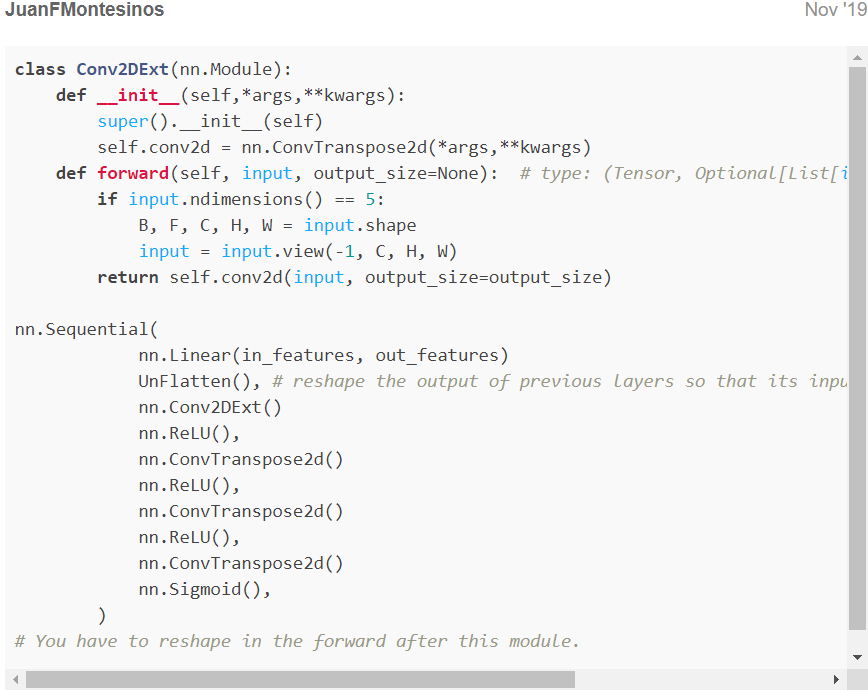


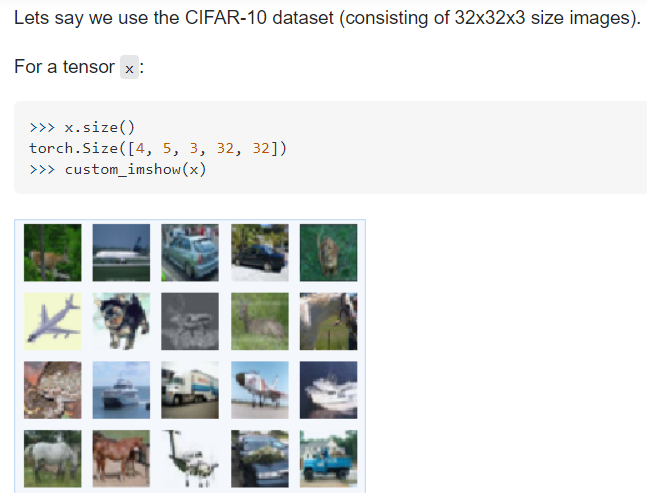

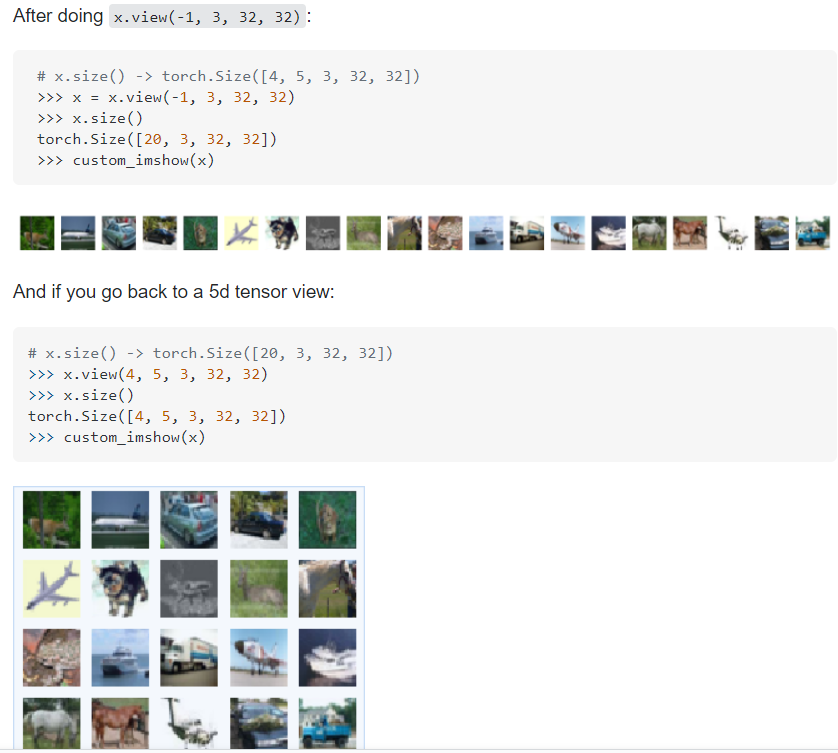

In [20]:
a = torch.rand((6, 3, 2, 217, 512))
a = a.transpose(1,2)
conv = nn.Conv3d(in_channels= 2, out_channels= 1, kernel_size=1, padding = 0) #<-- Out channels = 1
b= conv(a[:,:,0:1,:,:])
c= conv(a[:,:,1:2,:,:])
d= conv(a[:,:,2:3,:,:])
e = torch.cat((b,c,d), dim=2).transpose(2,1)
for i in [a,b,c,d,e]:
  print(i.shape)
#torch.Size([6, 2, 3, 217, 512])
#torch.Size([6, 1, 1, 217, 512])
#torch.Size([6, 1, 1, 217, 512])
#torch.Size([6, 1, 1, 217, 512])
#torch.Size([6, 3, 1, 217, 512]) <--goal dimension

torch.Size([6, 2, 3, 217, 512])
torch.Size([6, 1, 1, 217, 512])
torch.Size([6, 1, 1, 217, 512])
torch.Size([6, 1, 1, 217, 512])
torch.Size([6, 3, 1, 217, 512])


In [21]:
a = torch.rand(2,2)
print(a.dim())

2


In [22]:
# torch.sum and max 
print(tensor_add_1)
print(tensor_add_2)

value,indicies = torch.max(tensor_add_1,dim=1) # here dim= 0 is columns and 1 is rows
print(value)

print(torch.maximum(tensor_add_1,tensor_add_2)) # here it compares each value of 1 tensor with the corresponding value with the 
#second tensor and gives the output 

print(torch.maximum(tensor_add_1,torch.tensor([[1,1,1],[1,1,1]])))



#most important #argmax and argmin

max_arg = torch.argmax(tensor_add_2,dim=0,keepdim=True) # it returns the index value 
print(max_arg)
max_arg = torch.argmax(tensor_add_2,keepdim=True) # it returns the index value 
print(max_arg)
values = tensor_add_2.flatten() # flatten and view 
value = tensor_add_2.view(tensor_add_2.size()) # second way to flatten
value = tensor_add_2.view(-1) # 3rd way
value_max = values[max_arg]
print(value_max)
min_arg = torch.argmin(tensor_add_2,keepdim=True) # it returns the index value 
print(min_arg)



tensor([[1, 2, 3],
        [7, 8, 8]])
tensor([[3, 4, 3],
        [6, 6, 6]])
tensor([3, 8])
tensor([[3, 4, 3],
        [7, 8, 8]])
tensor([[1, 2, 3],
        [7, 8, 8]])
tensor([[1, 1, 1]])
tensor(3)
tensor(6)
tensor(0)


In [23]:
# Comparing two tensors 
print(tensor_add_1)
print(tensor_add_2)

torch.eq(tensor_add_1,tensor_add_2) #elementwise checking is done here


tensor([[1, 2, 3],
        [7, 8, 8]])
tensor([[3, 4, 3],
        [6, 6, 6]])


tensor([[False, False,  True],
        [False, False, False]])

In [24]:
# Sorting 
print(torch.sort(tensor_add_1,descending=True).values)
torch.sort(tensor_add_1,descending=True).indices
torch.sort(tensor_add_1,dim=1,descending=True).values

tensor([[3, 2, 1],
        [8, 8, 7]])


tensor([[3, 2, 1],
        [8, 8, 7]])

In [25]:
#vvvvvviiiimmpp
#clamp
print(torch.clamp(tensor_add_1,3))# when we clamp it 
test1 = torch.rand(2,3,3)
print(test1)
print(torch.clamp_(test1,0.5)) # anything below this value is clamped to this 


tensor([[3, 3, 3],
        [7, 8, 8]])
tensor([[[0.8834, 0.5721, 0.7643],
         [0.4676, 0.9869, 0.9122],
         [0.7175, 0.6476, 0.4073]],

        [[0.4791, 0.3317, 0.6373],
         [0.5199, 0.8520, 0.7518],
         [0.6165, 0.2015, 0.8225]]])
tensor([[[0.8834, 0.5721, 0.7643],
         [0.5000, 0.9869, 0.9122],
         [0.7175, 0.6476, 0.5000]],

        [[0.5000, 0.5000, 0.6373],
         [0.5199, 0.8520, 0.7518],
         [0.6165, 0.5000, 0.8225]]])


INDEXING


Vimportant topic and need to be learnt daily for 5 min

In [51]:
batch_size = 20
features = 30

tensor_2 = torch.rand(4,3)
print(tensor_2)
print(tensor_2[0]) # 0th row and all the column 
print(tensor_2[0,:]) # 0th row and all the column same way 


#1strow all the column
print(tensor_2[1,:])


#1st column and all rows 
print(tensor_2[:,0])
print(tensor_2[:,1])


# In a small range 0-1 rows and 
print(tensor_2[0:2,1:])
print(tensor_2[2:,0:2])
# we dont get the last values


x = torch.rand((batch_size,features))
print(x.shape)
# indexind on the big x sounds better 

print(x[0].shape)
print(x[3,0:10]) #3rd row all the features from 0 to 10 

tensor([[0.8368, 0.5480, 0.2145],
        [0.3520, 0.1157, 0.6591],
        [0.4504, 0.7460, 0.3202],
        [0.5719, 0.2151, 0.1908]])
tensor([0.8368, 0.5480, 0.2145])
tensor([0.8368, 0.5480, 0.2145])
tensor([0.3520, 0.1157, 0.6591])
tensor([0.8368, 0.3520, 0.4504, 0.5719])
tensor([0.5480, 0.1157, 0.7460, 0.2151])
tensor([[0.5480, 0.2145],
        [0.1157, 0.6591]])
tensor([[0.4504, 0.7460],
        [0.5719, 0.2151]])
torch.Size([20, 30])
torch.Size([30])
tensor([0.8736, 0.8741, 0.3811, 0.5276, 0.7484, 0.1027, 0.3350, 0.5583, 0.3636,
        0.0269])


In [29]:
batch_size = 20
xfeatures = 30
yfeatures = 30

x = torch.rand((batch_size,features,yfeatures))
print(x.shape)


torch.Size([20, 30, 30])


In [71]:
# Fancy Indexing 

x = torch.arange(0,100,5)
indices = torch.arange(0,10,3)

print(x)
print(indices)

print(x[indices]) # indexing 
print(x[indices][2]) #sub indexing 


tensor([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
        90, 95])
tensor([0, 3, 6, 9])
tensor([ 0, 15, 30, 45])
tensor(30)


In [91]:
# Adv
y = torch.arange(10)
print(y[(y<2)|(y>8)])
print(y[y.remainder(2) == 0])
print(y[y.remainder(2) != 0])

tensor([0, 1, 9])
tensor([0, 2, 4, 6, 8])
tensor([1, 3, 5, 7, 9])


In [113]:
#view and contiguoius 

x = torch.arange(10)
print(x)

x_52 = x.view(2,5)
print(x_52)


x_back_1 = x_52.view(10)
print(x_back_1)

x_52t = x_52.t()
print(x_52t)

#x_back = x_52t.view(10) This will give Error as shown below 
#RuntimeError: view size is not compatible with input tensor's size and stride 
#(at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

x_back = x_52t.contiguous().view(10)
print(x_back) # we get back the shape but the order wont be preserved cuz of transpose 





tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])
tensor([0, 5, 1, 6, 2, 7, 3, 8, 4, 9])


In [110]:
# Using reshape
x = torch.arange(10)
print(x)

x_52 = x.reshape(2,5)
print(x_52)

x_52t = x_52.t()
print(x_52t)

#x_back = x_52t.view(10) This will give Error as shown below 
#RuntimeError: view size is not compatible with input tensor's size and stride 
#(at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

x_back = x_52t.reshape(10)
print(x_back) # we get back the shape but the order wont be preserved 

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])
tensor([0, 5, 1, 6, 2, 7, 3, 8, 4, 9])


In [134]:
# Concat 
x1 = torch.tensor([[1,2,3],[4,5,6]])
x2 = torch.arange(6).reshape(2,3)
val1 = x1.shape 
val2 =x2.shape
print(f"Shapes of x1:{val1} and x2:{val2}")

print (torch.cat((x1,x2),dim=0)) # rows are concatinated : default
print (torch.cat((x1,x2),dim=0).shape)
print (torch.cat((x1,x2),dim=1)) # cols are concatinated default
print (torch.cat((x1,x2),dim=1).shape) # see the shapes to get a better idea



Shapes of x1:torch.Size([2, 3]) and x2:torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [0, 1, 2],
        [3, 4, 5]])
torch.Size([4, 3])
tensor([[1, 2, 3, 0, 1, 2],
        [4, 5, 6, 3, 4, 5]])
torch.Size([2, 6])
tensor([[1, 2, 3],
        [4, 5, 6],
        [0, 1, 2],
        [3, 4, 5]])


In [151]:
# permute 

batch_size = 64
x1 = 10
x2 = 12

tensor = torch.rand((batch_size,x1,x2))
print(tensor.shape)

# now i have to keep the batch size same and flatten rest 
print(tensor.view(batch_size,-1).shape)
print(tensor.view(batch_size,-1).view(-1).shape)

#Now i want to change the dimension from 64, 10, 12 to 64, 12, 10
print(tensor.permute(0,2,1).shape)

print(torch.randperm(tensor.shape[0]).shape)


torch.Size([64, 10, 12])
torch.Size([64, 120])
torch.Size([7680])
torch.Size([64, 12, 10])
torch.Size([64])


In [166]:
# Shuffing the images ##################***************************

Image = torch.rand((500,3,128,128))
val = Image.shape[0]
print(val)
idx = torch.randperm(val)
print(idx.shape)
print(Image[idx].shape)
print(Image.view(Image.size()).shape)
Image_new = Image[idx].view(Image.size())
print(torch.all(Image_new==Image))
print(torch.all(Image==Image))
print(Image_new.shape)


500
torch.Size([500])
torch.Size([500, 3, 128, 128])
torch.Size([500, 3, 128, 128])
tensor(False)
tensor(True)
torch.Size([500, 3, 128, 128])


In [104]:
# Getting Unique Values from a tensor 
tensor_unique = torch.tensor([[1,1,1,2,3,3,2,4],[1,2,8,2,3,3,2,4]])
print(tensor_unique.unique(return_counts=True))

# counting the number of elements in an tensor or array 
# numel
print(tensor_unique.numel())

(tensor([1, 2, 3, 4, 8]), tensor([4, 5, 4, 2, 1]))
16


In [64]:
tuple = {} # key value pair dict 
tuple[(1,2,4)] = 8
tuple[(4,2,1)] = 10
tuple[(1,2)] = 12

print(tuple.values())
sum =0
# here k refers to the keys dict[keys] = values  
for k in tuple:
  sum +=tuple[k]
print(len(tuple)+sum)

dict_values([8, 10, 12])
33


In [ ]:
#